In [29]:
import numpy as np
import pandas as pd
import pylab as plt
import seaborn as sns
import pydotplus
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.datasets import load_digits
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [2]:
data = load_digits()
X, y = data.data, data.target

In [5]:
X[0, :].reshape([8, 8])

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

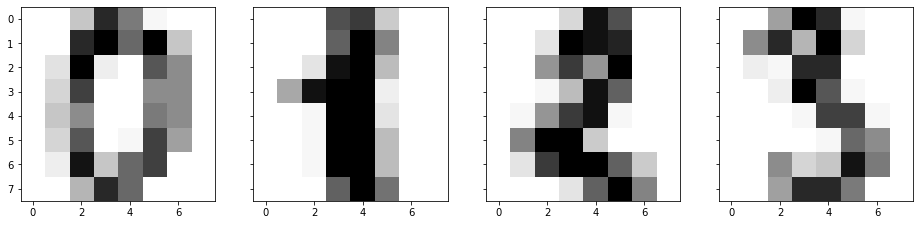

In [9]:
f, axes = plt.subplots(1, 4, sharey=True, figsize=(16, 6))
for i in range(4):
    axes[i].imshow(X[i, :].reshape([8, 8]), cmap='Greys')

Теперь нужно разделить выборку 70/30. Отложеная выборка holdout не будет учавсвовать в настройке параметров модели. Она нужна чисто для проверки 

In [10]:
from sklearn.model_selection import train_test_split, StratifiedKFold

In [18]:
X_train, X_hold, y_train, y_hold = train_test_split(X, y, test_size=0.3, random_state=17)

In [19]:
tree = DecisionTreeClassifier(max_depth=5, random_state=17)
knn = KNeighborsClassifier(n_neighbors=10)

In [20]:
%%time
tree.fit(X_train, y_train)

Wall time: 8.01 ms


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=17, splitter='best')

In [21]:
%%time
knn.fit(X_train, y_train)

Wall time: 4 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [22]:
tree_predict = tree.predict(X_hold)

In [24]:
knn_predict = knn.predict(X_hold)

In [26]:
accuracy_score(y_hold, knn_predict), accuracy_score(y_hold, tree_predict)

(0.9740740740740741, 0.6666666666666666)

Видим что результаты неутишительные, значит нужно настроить параметры кроссвалидации max_depth, max_features

In [61]:
tree_params = {'max_depth': [1, 2, 3] + list(range(5, 20, 1)) + [64],
              'max_features': [1, 2, 3, 5] + list(range(10, 50, 10)) + [64]
              }


In [62]:
tree_grid = GridSearchCV(tree, tree_params, cv=5, n_jobs=-1, verbose=True)

In [63]:
tree_grid.fit(X_train, y_train)

Fitting 5 folds for each of 171 candidates, totalling 855 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 855 out of 855 | elapsed:    1.1s finished
C:\Users\Vlad\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=5,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=17,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16, 17, 18, 19, 6

In [64]:
accuracy_score(y_hold, tree_grid.predict(X_hold))

0.8333333333333334